# E-Commerce Customer Segmentation & Personalization

## Project Overview

This notebook performs comprehensive customer segmentation analysis for e-commerce businesses using:
- **RFM Analysis** (Recency, Frequency, Monetary)
- **Machine Learning Clustering** (K-Means, Hierarchical, DBSCAN)
- **Customer Profiling & Personalization Strategies**

### Business Objectives:
1. Identify distinct customer segments based on purchasing behavior
2. Understand customer lifetime value and engagement patterns
3. Develop targeted marketing strategies for each segment
4. Improve customer retention and reduce churn
5. Personalize product recommendations and campaigns

## 1. Setup and Import Libraries

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import custom modules
import sys
sys.path.append('./src')

from preprocessing import (
    load_data, clean_data, parse_dates, remove_outliers,
    create_transaction_features, prepare_for_segmentation
)
from rfm_analysis import (
    calculate_rfm, calculate_rfm_scores, segment_customers, get_segment_summary
)
from clustering import (
    prepare_features_for_clustering, find_optimal_clusters, plot_elbow_curve,
    perform_kmeans_clustering, perform_hierarchical_clustering, perform_dbscan_clustering,
    analyze_clusters, assign_cluster_names
)
from visualization import (
    plot_rfm_distribution, plot_rfm_scatter, plot_segment_distribution,
    plot_segment_rfm_comparison, plot_cluster_analysis, plot_correlation_heatmap,
    plot_customer_lifetime_value, create_interactive_dashboard
)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Real E-Commerce Data

Loading the actual Online Retail dataset from the data folder.

In [2]:
# Load the actual Online Retail data
data_path = './data/Online Retail.xlsx'

print("Loading data from:", data_path)
df_raw = pd.read_excel(data_path)

print(f"\nLoaded {len(df_raw):,} transactions")
print(f"Date range: {df_raw['InvoiceDate'].min()} to {df_raw['InvoiceDate'].max()}")
print(f"Number of unique customers: {df_raw['CustomerID'].nunique():,}")
print(f"\nFirst few rows:")
df_raw.head()

Loading data from: ./data/Online Retail.xlsx

Loaded 541,909 transactions
Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Number of unique customers: 4,372

First few rows:

Loaded 541,909 transactions
Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Number of unique customers: 4,372

First few rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


### Alternative: Load Your Own Data

Uncomment and modify the following cell to load your actual e-commerce data:

In [3]:
# # Load your data
# df_raw = load_data('data/your_ecommerce_data.csv')
# 
# # Display basic info
# print(f"Dataset shape: {df_raw.shape}")
# print(f"\nColumn names: {df_raw.columns.tolist()}")
# df_raw.head()

## 3. Data Exploration

In [4]:
# Basic information
print("Dataset Shape:", df_raw.shape)
print("\nData Types:")
print(df_raw.dtypes)
print("\nMissing Values:")
print(df_raw.isnull().sum())
print("\nBasic Statistics:")
df_raw.describe()

Dataset Shape: (541909, 8)

Data Types:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

Missing Values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Basic Statistics:


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.00,541909,541909.00,406829.00
mean,9.55,2011-07-04 13:34:57.156386048,4.61,15287.69
min,-80995.00,2010-12-01 08:26:00,-11062.06,12346.00
25%,1.00,2011-03-28 11:34:00,1.25,13953.00
50%,3.00,2011-07-19 17:17:00,2.08,15152.00
75%,10.00,2011-10-19 11:27:00,4.13,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,218.08,NaN,96.76,1713.60


In [6]:
# Check for unique values
print(f"Unique Customers: {df_raw['CustomerID'].nunique()}")
print(f"Unique Products: {df_raw['StockCode'].nunique()}")
print(f"Unique Invoices: {df_raw['InvoiceNo'].nunique()}")
print(f"Countries: {df_raw['Country'].nunique()}")
print(f"\nTop 10 Countries by transaction count:")
print(df_raw['Country'].value_counts().head(10))

Unique Customers: 4372
Unique Products: 4070
Unique Invoices: 25900
Countries: 38

Top 10 Countries by transaction count:
Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: count, dtype: int64


## 4. Data Preprocessing

In [7]:
# Clean the data
df_clean = clean_data(df_raw.copy())

# Parse dates
df_clean = parse_dates(df_clean, 'InvoiceDate')

# Create transaction features
df_clean = create_transaction_features(df_clean)

# Prepare for segmentation
df_clean = prepare_for_segmentation(df_clean)

print("\nCleaned data shape:", df_clean.shape)
df_clean.head()

Initial shape: (541909, 8)

Missing values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

After removing duplicates: (536641, 8)

Cleaned data shape: (392692, 13)

After removing duplicates: (536641, 8)

Cleaned data shape: (392692, 13)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek,Month,Year,Hour,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,2,12,2010,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,2,12,2010,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,2,12,2010,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,2,12,2010,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,2,12,2010,8,20.34


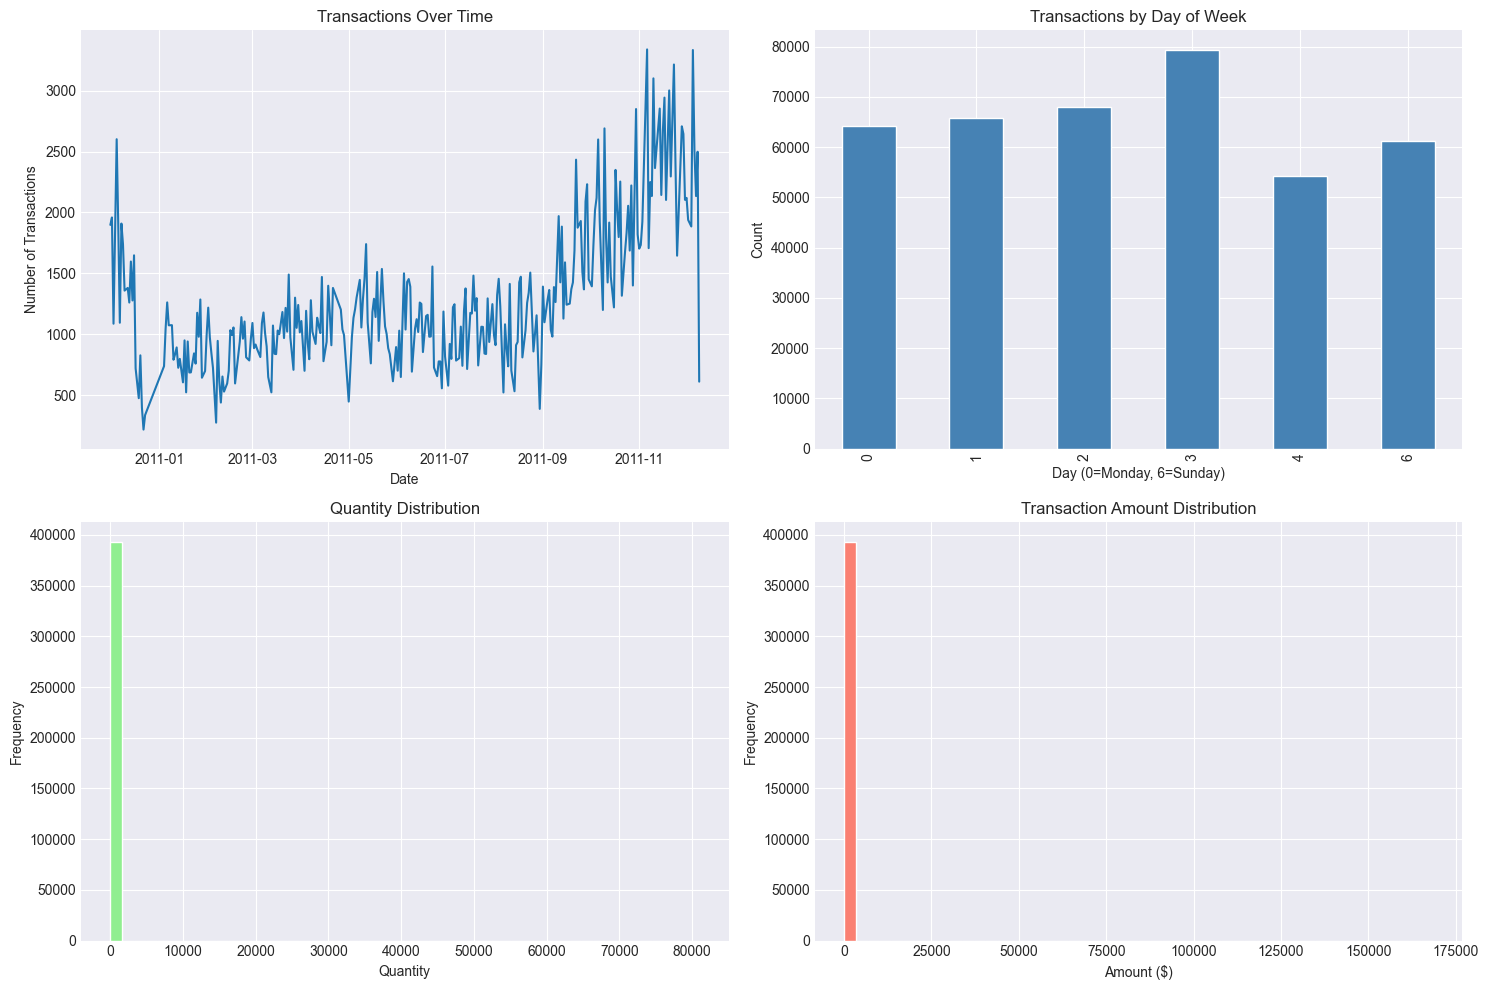

In [8]:
# Visualize transaction patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Transactions over time
df_clean.groupby(df_clean['InvoiceDate'].dt.date).size().plot(ax=axes[0, 0])
axes[0, 0].set_title('Transactions Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Number of Transactions')

# Transactions by day of week
df_clean['DayOfWeek'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 1], color='steelblue')
axes[0, 1].set_title('Transactions by Day of Week')
axes[0, 1].set_xlabel('Day (0=Monday, 6=Sunday)')
axes[0, 1].set_ylabel('Count')

# Quantity distribution
df_clean['Quantity'].hist(bins=50, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Quantity Distribution')
axes[1, 0].set_xlabel('Quantity')
axes[1, 0].set_ylabel('Frequency')

# Total amount distribution
df_clean['TotalAmount'].hist(bins=50, ax=axes[1, 1], color='salmon')
axes[1, 1].set_title('Transaction Amount Distribution')
axes[1, 1].set_xlabel('Amount ($)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 5. RFM Analysis

RFM stands for:
- **Recency**: How recently did the customer make a purchase?
- **Frequency**: How often do they purchase?
- **Monetary**: How much do they spend?

In [10]:
# Calculate RFM metrics
rfm = calculate_rfm(
    df_clean,
    customer_id_col='CustomerID',
    date_col='InvoiceDate',
    amount_col='TotalAmount'
)

print("RFM Data Shape:", rfm.shape)
print("\nRFM Summary Statistics:")
print(rfm[['Recency', 'Frequency', 'Monetary']].describe())
print("\nSample RFM Data:")
rfm.head(10)

RFM Data Shape: (4338, 4)

RFM Summary Statistics:
       Recency  Frequency  Monetary
count  4338.00    4338.00   4338.00
mean     92.54      90.52   2048.69
std     100.01     225.51   8985.23
min       1.00       1.00      3.75
25%      18.00      17.00    306.48
50%      51.00      41.00    668.57
75%     142.00      98.00   1660.60
max     374.00    7676.00 280206.02

Sample RFM Data:


,CustomerID,Recency,Frequency,Monetary
0,12346.00,326,1,77183.60
1,12347.00,2,182,4310.00
2,12348.00,75,31,1797.24
3,12349.00,19,73,1757.55
4,12350.00,310,17,334.40
5,12352.00,36,85,2506.04
6,12353.00,204,4,89.00
7,12354.00,232,58,1079.40
8,12355.00,214,13,459.40
9,12356.00,23,59,2811.43


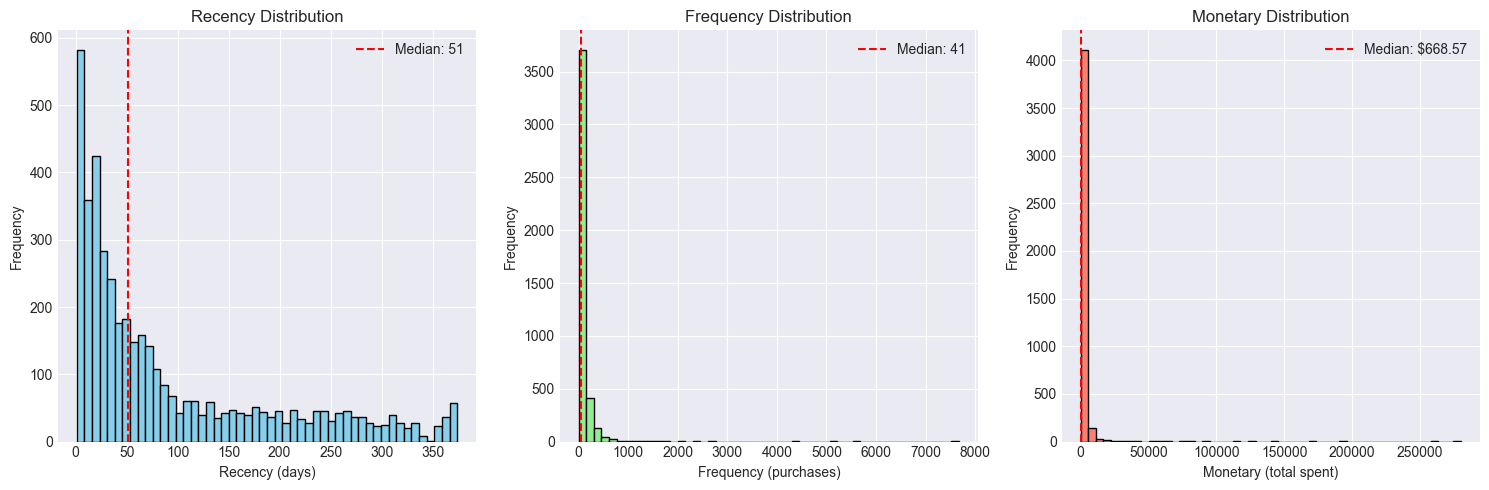

In [11]:
# Visualize RFM distributions
plot_rfm_distribution(rfm)

In [12]:
# Calculate RFM scores
rfm_scored = calculate_rfm_scores(rfm)

print("RFM with Scores:")
print(rfm_scored.head(10))
print("\nRFM Score Distribution:")
print(rfm_scored['RFM_Score_Sum'].describe())

RFM with Scores:
   CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0    12346.00      326          1  77183.60        1        1        5   
1    12347.00        2        182   4310.00        5        5        5   
2    12348.00       75         31   1797.24        2        3        4   
3    12349.00       19         73   1757.55        4        4        4   
4    12350.00      310         17    334.40        1        2        2   
5    12352.00       36         85   2506.04        3        4        5   
6    12353.00      204          4     89.00        1        1        1   
7    12354.00      232         58   1079.40        1        4        4   
8    12355.00      214         13    459.40        1        1        2   
9    12356.00       23         59   2811.43        4        4        5   

  RFM_Score  RFM_Score_Sum  
0       115              7  
1       555             15  
2       234              9  
3       444             12  
4       122            

## 6. Customer Segmentation using RFM

In [13]:
# Segment customers based on RFM scores
rfm_segmented = segment_customers(rfm_scored)

print("Customer Segments:")
print(rfm_segmented['Segment'].value_counts())
print("\nSample Segmented Data:")
rfm_segmented.head(10)

Customer Segments:
Segment
About to Sleep                 1374
Champions                       929
Potential Loyalists             485
Loyal Customers                 421
At Risk                         329
Promising                       251
Recent Customers                204
Others                          152
Customers Needing Attention     147
Lost                             46
Name: count, dtype: int64

Sample Segmented Data:


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Score_Sum,Segment
0,12346.00,326,1,77183.60,1,1,5,115,7,Lost
1,12347.00,2,182,4310.00,5,5,5,555,15,Champions
2,12348.00,75,31,1797.24,2,3,4,234,9,At Risk
3,12349.00,19,73,1757.55,4,4,4,444,12,Champions
4,12350.00,310,17,334.40,1,2,2,122,5,About to Sleep
5,12352.00,36,85,2506.04,3,4,5,345,12,Loyal Customers
6,12353.00,204,4,89.00,1,1,1,111,3,About to Sleep
7,12354.00,232,58,1079.40,1,4,4,144,9,At Risk
8,12355.00,214,13,459.40,1,1,2,112,4,About to Sleep
9,12356.00,23,59,2811.43,4,4,5,445,13,Champions


In [14]:
# Get segment summary
segment_summary = get_segment_summary(rfm_segmented)
print("\nSegment Summary:")
segment_summary


Segment Summary:


,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Monetary_sum,Customer_Count
Segment,,,,,,,,
About to Sleep,195.26,190.00,20.03,17.50,350.68,307.52,481833.38,1374
Champions,13.03,11.00,255.88,163.00,6091.41,2662.40,5658920.41,929
Potential Loyalists,16.35,17.00,39.69,37.00,945.51,616.26,458574.30,485
Loyal Customers,40.57,43.00,132.84,113.00,2025.26,1219.40,852634.57,421
At Risk,144.33,121.00,96.50,79.00,1801.41,1345.62,592664.54,329
Promising,53.70,53.00,14.78,14.00,262.17,255.90,65805.92,251
Recent Customers,17.81,18.00,9.68,9.00,1276.42,196.92,260389.75,204
Others,72.21,65.00,44.88,37.00,1048.25,417.47,159333.91,152
Customers Needing Attention,53.55,54.00,41.47,41.00,1051.98,798.99,154641.10,147


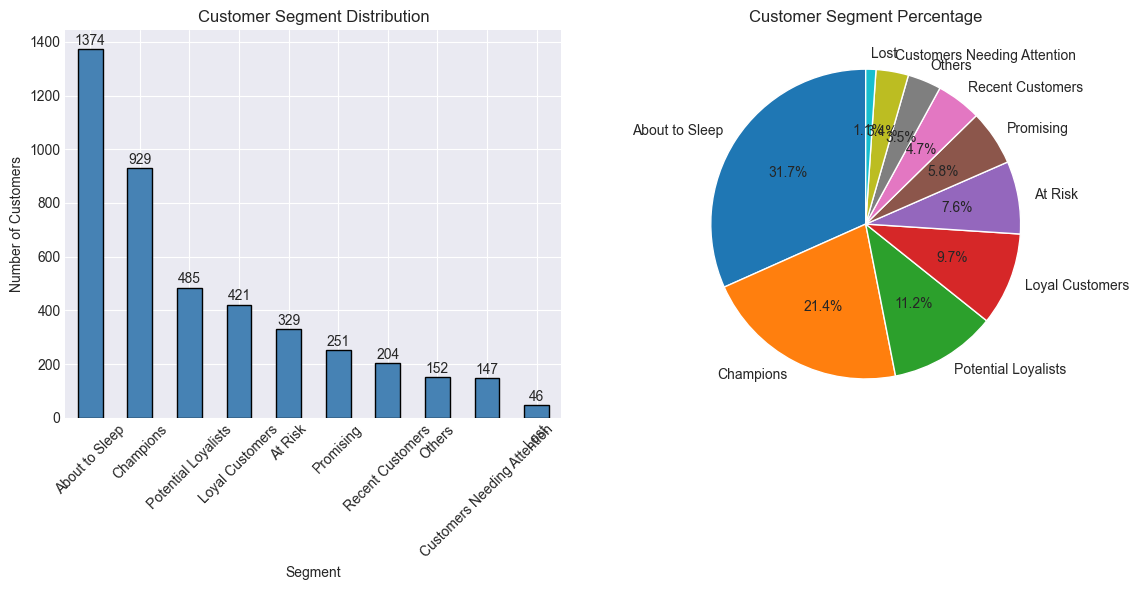

In [15]:
# Visualize segment distribution
plot_segment_distribution(rfm_segmented)

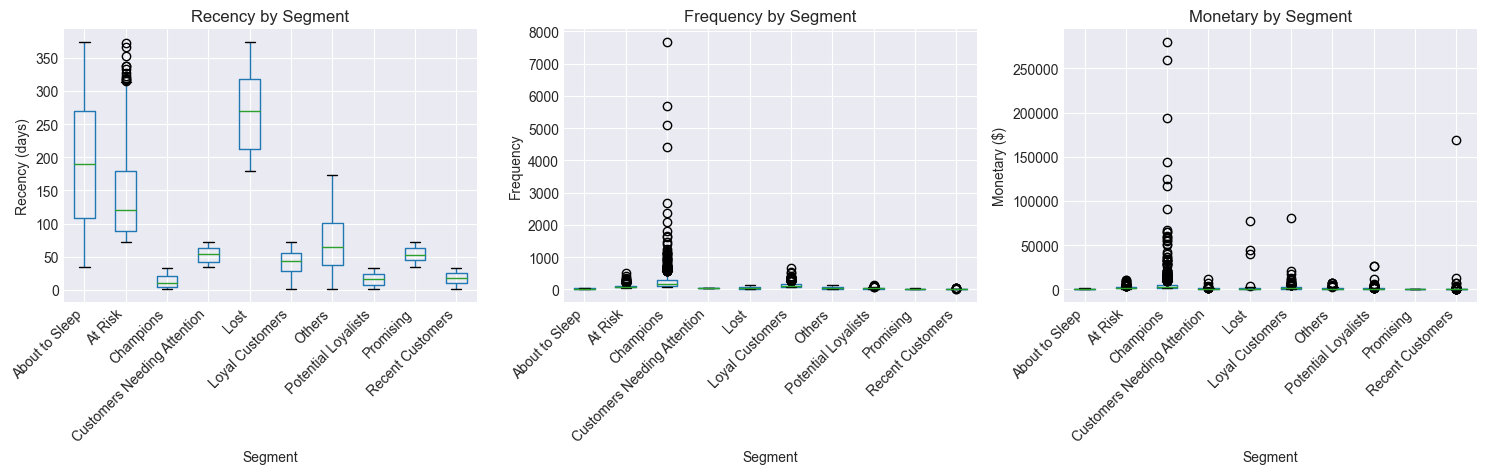

In [16]:
# Compare RFM metrics across segments
plot_segment_rfm_comparison(rfm_segmented)

In [17]:
# 3D scatter plot of segments
plot_rfm_scatter(rfm_segmented)

## 7. Machine Learning Clustering

We'll use multiple clustering algorithms to identify customer segments:
1. K-Means Clustering
2. Hierarchical Clustering
3. DBSCAN (Density-Based)

### 7.1 Prepare Features for Clustering

In [18]:
# Prepare and scale features for clustering
X_scaled, scaler = prepare_features_for_clustering(rfm_segmented)

print("Scaled features shape:", X_scaled.shape)
print("\nScaled features sample:")
print(X_scaled[:5])

Scaled features shape: (4338, 3)

Scaled features sample:
[[ 2.33457414 -0.39703458  8.36301037]
 [-0.90534032  0.4056939   0.2516989 ]
 [-0.17535959 -0.26398566 -0.02798783]
 [-0.73534481 -0.07771717 -0.03240559]
 [ 2.17457836 -0.32607515 -0.19081155]]


### 7.2 Find Optimal Number of Clusters

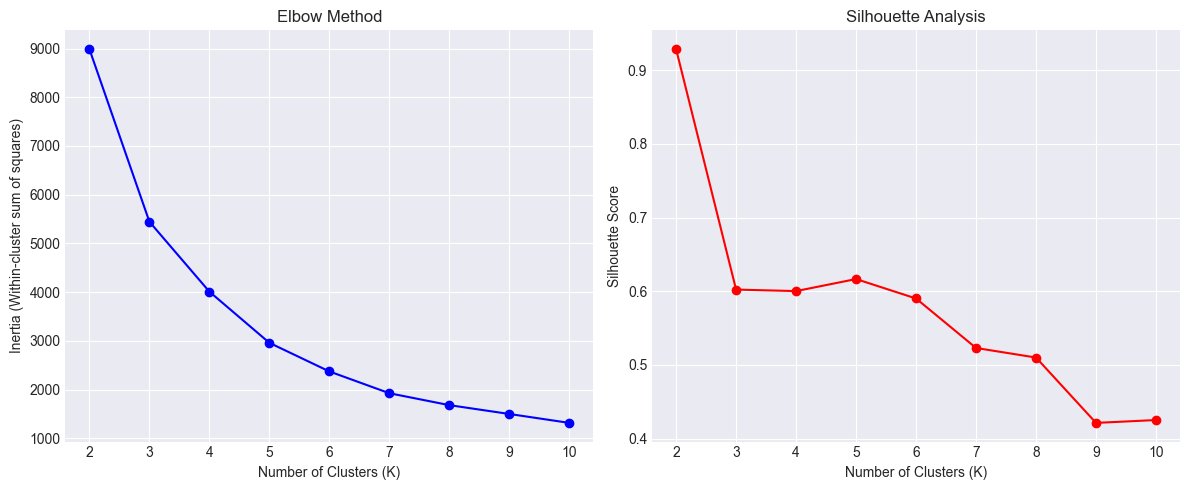

In [19]:
# Find optimal clusters
cluster_results = find_optimal_clusters(X_scaled, max_clusters=10)

# Plot elbow curve and silhouette scores
plot_elbow_curve(cluster_results)

In [20]:
# Display silhouette scores
print("Silhouette Scores by Number of Clusters:")
for k, score in zip(cluster_results['K_range'], cluster_results['silhouette_scores']):
    print(f"K={k}: {score:.4f}")

Silhouette Scores by Number of Clusters:
K=2: 0.9284
K=3: 0.6023
K=4: 0.6002
K=5: 0.6166
K=6: 0.5902
K=7: 0.5231
K=8: 0.5101
K=9: 0.4215
K=10: 0.4254


### 7.3 K-Means Clustering

In [21]:
# Perform K-Means clustering (choose optimal k based on elbow/silhouette)
optimal_k = 4  # Adjust based on the plots above

kmeans_model, kmeans_labels, kmeans_metrics = perform_kmeans_clustering(X_scaled, n_clusters=optimal_k)

print("K-Means Clustering Results:")
print(f"Number of clusters: {optimal_k}")
print(f"Silhouette Score: {kmeans_metrics['silhouette_score']:.4f}")
print(f"Davies-Bouldin Score: {kmeans_metrics['davies_bouldin_score']:.4f}")
print(f"Inertia: {kmeans_metrics['inertia']:.2f}")

# Add cluster labels to RFM dataframe
rfm_kmeans = rfm.copy()
rfm_kmeans['KMeans_Cluster'] = kmeans_labels

K-Means Clustering Results:
Number of clusters: 4
Silhouette Score: 0.6002
Davies-Bouldin Score: 0.5628
Inertia: 4010.30


In [22]:
# Analyze K-Means clusters
kmeans_cluster_summary = analyze_clusters(rfm_kmeans, kmeans_labels, cluster_col='KMeans_Cluster')
print("\nK-Means Cluster Summary:")
kmeans_cluster_summary


K-Means Cluster Summary:


,Recency_mean,Recency_median,Recency_std,Frequency_mean,Frequency_median,Frequency_std,Monetary_mean,Monetary_median,Monetary_std,Monetary_sum,Customer_Count,Percentage
KMeans_Cluster,,,,,,,,,,,,
0,41.31,30.00,35.52,103.25,56.00,152.93,2085.86,920.51,4801.30,6772803.39,3247,74.85
1,247.21,242.00,66.86,27.40,18.00,30.91,635.62,310.06,3024.00,687105.29,1081,24.92
2,7.67,5.00,8.87,825.83,572.50,771.01,190808.54,181431.64,67827.05,1144851.22,6,0.14
3,2.00,1.50,1.41,5717.25,5390.50,1403.58,70612.25,52842.32,50627.28,282448.99,4,0.09


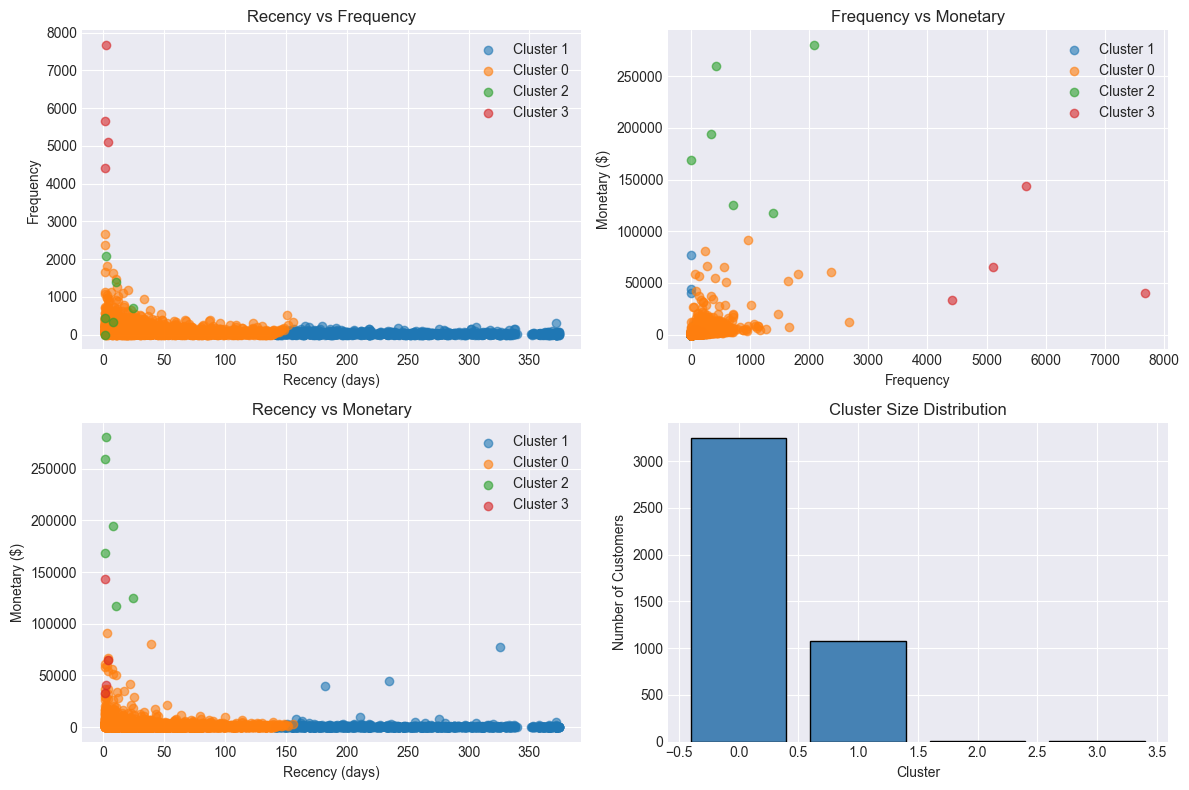

In [23]:
# Visualize K-Means clusters
plot_cluster_analysis(rfm_kmeans, cluster_col='KMeans_Cluster')

In [24]:
# Assign meaningful names to K-Means clusters
kmeans_cluster_names = assign_cluster_names(kmeans_cluster_summary)
print("\nCluster Names:")
for cluster_id, name in kmeans_cluster_names.items():
    print(f"Cluster {cluster_id}: {name}")

rfm_kmeans['Cluster_Name'] = rfm_kmeans['KMeans_Cluster'].map(kmeans_cluster_names)


Cluster Names:
Cluster 0: Potential Customers
Cluster 1: At Risk / Lost
Cluster 2: Champions
Cluster 3: Champions


### 7.4 Hierarchical Clustering

In [25]:
# Perform Hierarchical clustering
hierarchical_model, hierarchical_labels, hierarchical_metrics = perform_hierarchical_clustering(
    X_scaled, n_clusters=optimal_k
)

print("Hierarchical Clustering Results:")
print(f"Number of clusters: {optimal_k}")
print(f"Silhouette Score: {hierarchical_metrics['silhouette_score']:.4f}")
print(f"Davies-Bouldin Score: {hierarchical_metrics['davies_bouldin_score']:.4f}")

# Add cluster labels
rfm_hierarchical = rfm.copy()
rfm_hierarchical['Hierarchical_Cluster'] = hierarchical_labels

Hierarchical Clustering Results:
Number of clusters: 4
Silhouette Score: 0.5877
Davies-Bouldin Score: 0.5954


In [26]:
# Analyze Hierarchical clusters
hierarchical_cluster_summary = analyze_clusters(rfm_hierarchical, hierarchical_labels, cluster_col='Hierarchical_Cluster')
print("\nHierarchical Cluster Summary:")
hierarchical_cluster_summary


Hierarchical Cluster Summary:


,Recency_mean,Recency_median,Recency_std,Frequency_mean,Frequency_median,Frequency_std,Monetary_mean,Monetary_median,Monetary_std,Monetary_sum,Customer_Count,Percentage
Hierarchical_Cluster,,,,,,,,,,,,
0,38.36,29.00,32.48,105.26,58.00,154.24,2151.93,942.26,4906.24,6754903.12,3139,72.36
1,7.00,3.00,8.29,845.43,714.00,705.74,176559.09,168472.50,72491.97,1235913.60,7,0.16
2,236.51,233.00,71.97,28.19,19.00,30.11,516.79,316.26,703.40,613943.18,1188,27.39
3,2.00,1.50,1.41,5717.25,5390.50,1403.58,70612.25,52842.32,50627.28,282448.99,4,0.09


### 7.5 DBSCAN Clustering

In [27]:
# Perform DBSCAN clustering
dbscan_model, dbscan_labels, dbscan_metrics = perform_dbscan_clustering(X_scaled, eps=0.5, min_samples=10)

print("DBSCAN Clustering Results:")
print(f"Number of clusters: {dbscan_metrics['n_clusters']}")
print(f"Noise points: {dbscan_metrics['n_noise']}")
print(f"Noise ratio: {dbscan_metrics['noise_ratio']:.2%}")
if 'silhouette_score' in dbscan_metrics:
    print(f"Silhouette Score: {dbscan_metrics['silhouette_score']:.4f}")

# Add cluster labels
rfm_dbscan = rfm.copy()
rfm_dbscan['DBSCAN_Cluster'] = dbscan_labels

DBSCAN Clustering Results:
Number of clusters: 1
Noise points: 67
Noise ratio: 1.54%


## 8. Correlation Analysis

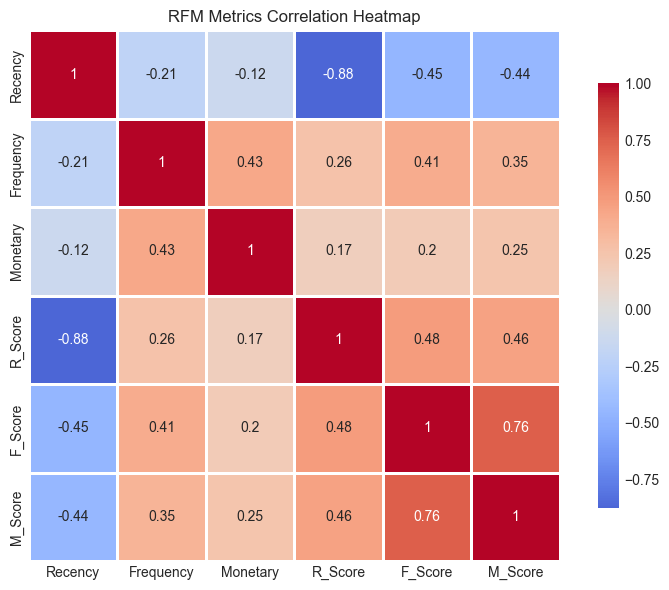

In [28]:
# Plot correlation heatmap
plot_correlation_heatmap(rfm_scored)

## 9. Customer Lifetime Value Analysis

In [29]:
# Top customers by lifetime value
plot_customer_lifetime_value(rfm_segmented, top_n=20)

In [30]:
# Calculate total revenue by segment
segment_revenue = rfm_segmented.groupby('Segment').agg({
    'Monetary': 'sum',
    'CustomerID': 'count'
}).rename(columns={'Monetary': 'Total_Revenue', 'CustomerID': 'Customer_Count'})

segment_revenue['Avg_Revenue_Per_Customer'] = segment_revenue['Total_Revenue'] / segment_revenue['Customer_Count']
segment_revenue = segment_revenue.sort_values('Total_Revenue', ascending=False)

print("Revenue Analysis by Segment:")
segment_revenue

Revenue Analysis by Segment:


,Total_Revenue,Customer_Count,Avg_Revenue_Per_Customer
Segment,,,
Champions,5658920.41,929,6091.41
Loyal Customers,852634.57,421,2025.26
At Risk,592664.54,329,1801.41
About to Sleep,481833.38,1374,350.68
Potential Loyalists,458574.30,485,945.51
Recent Customers,260389.75,204,1276.42
Lost,202411.01,46,4400.24
Others,159333.91,152,1048.25
Customers Needing Attention,154641.10,147,1051.98


## 10. Interactive Dashboard

In [ ]:
# Create interactive dashboard
create_interactive_dashboard(rfm_segmented)

## 11. Personalization Strategies

Based on the segmentation, here are targeted strategies for each segment:

In [ ]:
# Define personalization strategies
personalization_strategies = {
    'Champions': {
        'Description': 'Your best customers who buy frequently and spend the most',
        'Characteristics': 'High R, F, M scores',
        'Marketing Strategy': [
            'Reward with exclusive offers and early access to new products',
            'Create VIP loyalty programs',
            'Ask for reviews and testimonials',
            'Use them as brand ambassadors',
            'Cross-sell and upsell premium products'
        ],
        'Communication': 'Personalized, exclusive, premium',
        'Priority': 'Highest'
    },
    'Loyal Customers': {
        'Description': 'Customers who buy regularly with good monetary value',
        'Characteristics': 'High F and M, moderate R',
        'Marketing Strategy': [
            'Upsell higher-value products',
            'Offer loyalty rewards and points',
            'Engage through personalized recommendations',
            'Send product updates and new arrivals',
            'Create upgrade paths to Champions'
        ],
        'Communication': 'Regular, personalized, value-focused',
        'Priority': 'High'
    },
    'Potential Loyalists': {
        'Description': 'Recent customers with potential to become loyal',
        'Characteristics': 'High R, moderate F and M',
        'Marketing Strategy': [
            'Offer membership or loyalty programs',
            'Provide onboarding incentives',
            'Send educational content about products',
            'Create bundle offers to increase basket size',
            'Encourage repeat purchases with time-limited offers'
        ],
        'Communication': 'Frequent, educational, encouraging',
        'Priority': 'High'
    },
    'Recent Customers': {
        'Description': 'New customers who bought recently but not frequently',
        'Characteristics': 'High R, low F',
        'Marketing Strategy': [
            'Welcome series and onboarding emails',
            'Provide product guides and tutorials',
            'Offer first-purchase discounts for next order',
            'Build brand awareness and trust',
            'Collect feedback and preferences'
        ],
        'Communication': 'Welcoming, informative, supportive',
        'Priority': 'Medium-High'
    },
    'Promising': {
        'Description': 'Recent shoppers who haven\'t spent much yet',
        'Characteristics': 'High R, low F and M',
        'Marketing Strategy': [
            'Create awareness of full product range',
            'Offer starter bundles or discovery sets',
            'Provide free shipping incentives',
            'Share customer success stories',
            'Retarget with personalized ads'
        ],
        'Communication': 'Engaging, value-focused, educational',
        'Priority': 'Medium'
    },
    'Customers Needing Attention': {
        'Description': 'Above average customers who need re-engagement',
        'Characteristics': 'Moderate R, F, and M',
        'Marketing Strategy': [
            'Re-engagement campaigns',
            'Limited-time offers to spark interest',
            'Showcase new products and features',
            'Personalized recommendations based on past purchases',
            'Request feedback on their experience'
        ],
        'Communication': 'Proactive, personalized, value-driven',
        'Priority': 'Medium'
    },
    'About to Sleep': {
        'Description': 'Declining engagement, at risk of becoming inactive',
        'Characteristics': 'Low R, F, and M',
        'Marketing Strategy': [
            'Win-back campaigns with compelling offers',
            'Surveys to understand why they left',
            'Highlight product improvements',
            'Create urgency with limited-time discounts',
            'Remind them of past positive experiences'
        ],
        'Communication': 'Urgent, incentive-focused, emotional',
        'Priority': 'Medium-Low'
    },
    'At Risk': {
        'Description': 'Previously valuable customers who haven\'t purchased recently',
        'Characteristics': 'Low R, high F and M',
        'Marketing Strategy': [
            'Aggressive win-back campaigns',
            'Personalized offers based on purchase history',
            'VIP re-engagement with special perks',
            'Direct outreach (phone calls, personalized emails)',
            'Showcase product updates they might have missed'
        ],
        'Communication': 'Personalized, urgent, premium',
        'Priority': 'High (retention focus)'
    },
    'Cannot Lose Them': {
        'Description': 'High-value customers at serious risk of churning',
        'Characteristics': 'Very low R, very high F and M',
        'Marketing Strategy': [
            'Critical win-back with best offers',
            'Personal outreach from management',
            'Exclusive VIP recovery programs',
            'Substantial discounts or free products',
            'Address any service issues immediately'
        ],
        'Communication': 'Urgent, premium, personalized, apologetic if needed',
        'Priority': 'Critical'
    },
    'Hibernating': {
        'Description': 'Long time since last purchase, low historical value',
        'Characteristics': 'Very low R, F, and M',
        'Marketing Strategy': [
            'Low-cost re-engagement (email campaigns)',
            'Deep discounts to reactivate',
            'Showcase major product or brand changes',
            'Consider removing from regular campaigns',
            'Move to quarterly reactivation campaigns'
        ],
        'Communication': 'Minimal, cost-effective, broad',
        'Priority': 'Low'
    },
    'Lost': {
        'Description': 'Customers who have churned',
        'Characteristics': 'Lowest R score',
        'Marketing Strategy': [
            'Minimal investment in reactivation',
            'Annual win-back campaigns only',
            'Survey for feedback and learnings',
            'Consider suppression from regular marketing',
            'Focus resources on higher-value segments'
        ],
        'Communication': 'Rare, broad, low-cost',
        'Priority': 'Very Low'
    }
}

# Display strategies
for segment, strategy in personalization_strategies.items():
    if segment in rfm_segmented['Segment'].values:
        print(f"\n{'='*80}")
        print(f"SEGMENT: {segment}")
        print(f"{'='*80}")
        print(f"\nDescription: {strategy['Description']}")
        print(f"Characteristics: {strategy['Characteristics']}")
        print(f"Priority: {strategy['Priority']}")
        print(f"\nMarketing Strategies:")
        for i, strat in enumerate(strategy['Marketing Strategy'], 1):
            print(f"  {i}. {strat}")
        print(f"\nCommunication Style: {strategy['Communication']}")

## 12. Key Insights and Business Recommendations

In [ ]:
# Generate comprehensive insights report
print("="*80)
print("CUSTOMER SEGMENTATION ANALYSIS - KEY INSIGHTS")
print("="*80)

# Overall metrics
total_customers = len(rfm_segmented)
total_revenue = rfm_segmented['Monetary'].sum()
avg_revenue = rfm_segmented['Monetary'].mean()
avg_frequency = rfm_segmented['Frequency'].mean()
avg_recency = rfm_segmented['Recency'].mean()

print(f"\n1. OVERALL METRICS:")
print(f"   - Total Customers: {total_customers:,}")
print(f"   - Total Revenue: ${total_revenue:,.2f}")
print(f"   - Average Revenue per Customer: ${avg_revenue:,.2f}")
print(f"   - Average Purchase Frequency: {avg_frequency:.2f}")
print(f"   - Average Recency: {avg_recency:.1f} days")

# Segment distribution
print(f"\n2. CUSTOMER SEGMENT DISTRIBUTION:")
segment_dist = rfm_segmented['Segment'].value_counts()
for segment, count in segment_dist.items():
    percentage = (count / total_customers) * 100
    print(f"   - {segment}: {count:,} customers ({percentage:.1f}%)")

# Revenue contribution
print(f"\n3. REVENUE CONTRIBUTION BY SEGMENT:")
revenue_by_segment = rfm_segmented.groupby('Segment')['Monetary'].sum().sort_values(ascending=False)
for segment, revenue in revenue_by_segment.items():
    percentage = (revenue / total_revenue) * 100
    print(f"   - {segment}: ${revenue:,.2f} ({percentage:.1f}%)")

# High-value segments
high_value = ['Champions', 'Loyal Customers', 'Cannot Lose Them']
high_value_customers = rfm_segmented[rfm_segmented['Segment'].isin(high_value)]
high_value_revenue = high_value_customers['Monetary'].sum()
high_value_pct = (len(high_value_customers) / total_customers) * 100
high_value_revenue_pct = (high_value_revenue / total_revenue) * 100

print(f"\n4. HIGH-VALUE SEGMENTS ANALYSIS:")
print(f"   - Segments: Champions, Loyal Customers, Cannot Lose Them")
print(f"   - Customer Count: {len(high_value_customers):,} ({high_value_pct:.1f}% of total)")
print(f"   - Revenue: ${high_value_revenue:,.2f} ({high_value_revenue_pct:.1f}% of total)")
print(f"   - Insight: {high_value_pct:.1f}% of customers generate {high_value_revenue_pct:.1f}% of revenue")

# At-risk analysis
at_risk = ['At Risk', 'Cannot Lose Them', 'Hibernating']
at_risk_customers = rfm_segmented[rfm_segmented['Segment'].isin(at_risk)]
at_risk_revenue_potential = at_risk_customers['Monetary'].sum()

print(f"\n5. AT-RISK CUSTOMER ANALYSIS:")
print(f"   - Segments: At Risk, Cannot Lose Them, Hibernating")
print(f"   - Customer Count: {len(at_risk_customers):,} ({(len(at_risk_customers)/total_customers)*100:.1f}%)")
print(f"   - Historical Revenue: ${at_risk_revenue_potential:,.2f}")
print(f"   - Action Required: Implement win-back campaigns immediately")

print(f"\n6. KEY RECOMMENDATIONS:")
print(f"   a) Focus retention efforts on 'Cannot Lose Them' segment (highest ROI)")
print(f"   b) Implement loyalty programs for 'Potential Loyalists' to convert to 'Loyal'")
print(f"   c) Create VIP experiences for 'Champions' to maximize lifetime value")
print(f"   d) Develop automated re-engagement flows for declining segments")
print(f"   e) Invest in personalization for top 3 revenue-generating segments")
print(f"   f) Optimize marketing spend by reducing campaigns to 'Lost' segment")

print(f"\n{'='*80}")

## 13. Export Results

In [31]:
# Export segmented customer data
rfm_segmented.to_csv('results/customer_segments_rfm.csv', index=False)
rfm_kmeans.to_csv('results/customer_segments_kmeans.csv', index=False)

# Export segment summaries
segment_summary.to_csv('results/segment_summary.csv')
kmeans_cluster_summary.to_csv('results/kmeans_cluster_summary.csv')

print("Results exported successfully!")
print("\nExported files:")
print("  - results/customer_segments_rfm.csv")
print("  - results/customer_segments_kmeans.csv")
print("  - results/segment_summary.csv")
print("  - results/kmeans_cluster_summary.csv")

Results exported successfully!

Exported files:
  - results/customer_segments_rfm.csv
  - results/customer_segments_kmeans.csv
  - results/segment_summary.csv
  - results/kmeans_cluster_summary.csv


## Conclusion

This analysis has successfully:

1. **Segmented customers** using both RFM analysis and machine learning clustering
2. **Identified key customer groups** including Champions, Loyal Customers, At Risk, and Lost
3. **Quantified revenue contribution** by segment to prioritize marketing efforts
4. **Developed personalization strategies** tailored to each segment's characteristics
5. **Highlighted at-risk customers** requiring immediate retention efforts

### Next Steps:
- Implement automated marketing campaigns for each segment
- Set up monitoring dashboards to track segment migration
- A/B test personalization strategies
- Regularly refresh segmentation (monthly/quarterly)
- Integrate with CRM and marketing automation platforms

### Business Impact:
- **Increased retention** through targeted interventions
- **Higher conversion** rates with personalized messaging
- **Optimized marketing spend** by focusing on high-value segments
- **Improved customer lifetime value** through strategic engagement